<a href="https://colab.research.google.com/github/samah-tech/Data-Science-Business-Analytics_Internship/blob/main/TSF_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [2]:
#show the unique classes 
set(data['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

Encoding the Lables

In [4]:
data['Species'] = data['Species'].replace(['Iris-setosa'],0)
data['Species'] = data['Species'].replace(['Iris-versicolor'],1)
data['Species'] = data['Species'].replace(['Iris-virginica'],2)
print('Labels are encoded succesfully')

Labels are encoded succesfully


extract features and Labels

In [5]:
x = data.iloc[:,[1,2,3,4]]
y=data.iloc[:,5]

In [6]:
#featurs data 
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


splitting data into train and test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Building DecisionTreeClassifier

In [8]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
print('Decision Tree Classifer is Created')

Decision Tree Classifer is Created


In [9]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.90
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



visualize the model graphically

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
 
dot_data = export_graphviz(model, filled=True, rounded=True,
                                    class_names=['Iris-setosa',
                                                'Iris-versicolor',
                                                'Iris-virginica'],
                                    feature_names=['SepalLengthCm',
                                                'SepalWidthCm',
                                                'PetalLengthCm',
                                              'PetalWidthCm'],
                                    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

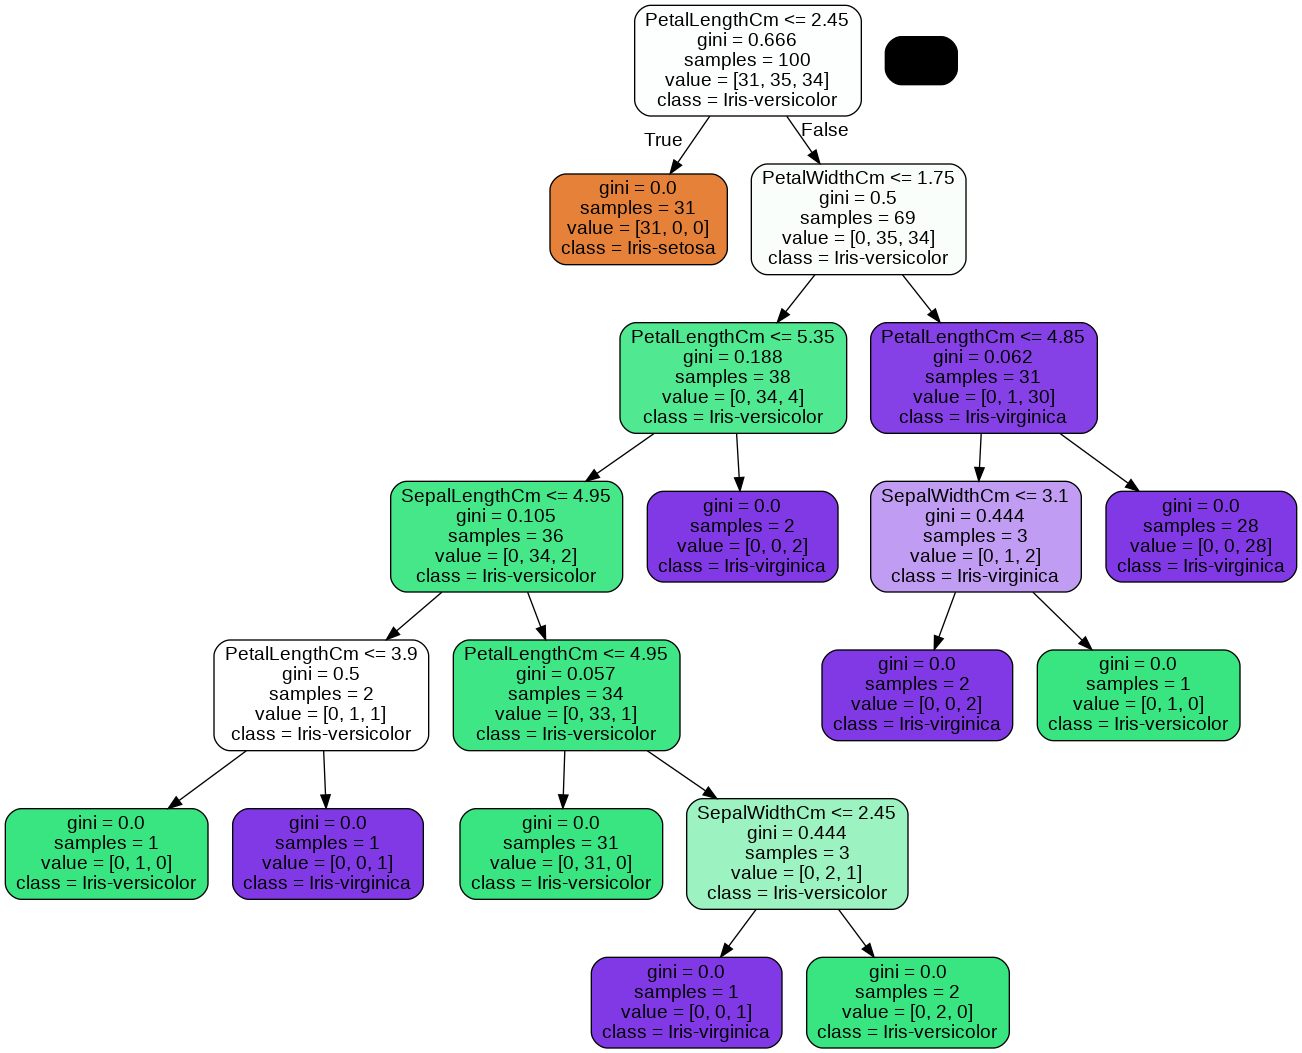

In [11]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('tree.png')
cv2_imshow(img)

make predictions


In [13]:
from sklearn.metrics import accuracy_score
predicted_classes = model.predict(X_test)
print("model accuracy: ",accuracy_score(y_test,predicted_classes)*100 ,"%")

model accuracy:  98.0 %


In [15]:
Results = pd.DataFrame({'True_labels': y_test , 'Predicted_Labels':predicted_classes })
Results

,True_labels,Predicted_Labels
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


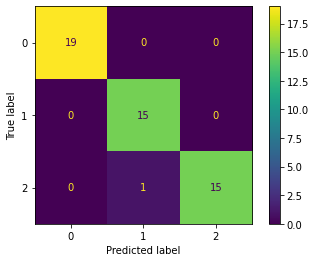

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test) 